

# Data


## Load

In [1]:
# Import libraries
import pandas as pd
import json

In [2]:
def read_json(file_path):
    # Initialize an empty list to store dictionaries
    data = []

    with open(file_path, 'r') as file:
        for line in file:
            json_data = json.loads(line)
            # Append JSON data to the list
            data.append(json_data)

    return pd.DataFrame(data)

receipts = read_json("receipts.json")
users = read_json("users.json")
brands = read_json("brands.json")

- Given files were first extracted to JSON and then processed.
- The files were not being loaded when in .gz directly due to empty error.

##Users

In [3]:
users.shape

(495, 7)

In [4]:
# Head
users.head(2)

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [5]:
users.columns

Index(['_id', 'active', 'createdDate', 'lastLogin', 'role', 'signUpSource',
       'state'],
      dtype='object')

In [6]:
# Get value counts for all columns
for col in users.columns:
    print(f"Value counts for column '{col}':")
    print(users[col].value_counts())
    print()

Value counts for column '_id':
{'$oid': '54943462e4b07e684157a532'}    20
{'$oid': '5fc961c3b8cfca11a077dd33'}    20
{'$oid': '5ff5d15aeb7c7d12096d91a2'}    18
{'$oid': '5fa41775898c7a11a6bcef3e'}    18
{'$oid': '59c124bae4b0299e55b0f330'}    18
                                        ..
{'$oid': '6004a965e257124ec6b9a39f'}     1
{'$oid': '600746fd6e64691717e8cfb5'}     1
{'$oid': '60074b996e64691717e8f11a'}     1
{'$oid': '60074246325c8a12289e22a0'}     1
{'$oid': '60088e5d633aab121bb8e5cf'}     1
Name: _id, Length: 212, dtype: int64

Value counts for column 'active':
True     494
False      1
Name: active, dtype: int64

Value counts for column 'createdDate':
{'$date': 1418998882381}    20
{'$date': 1607033283936}    20
{'$date': 1609945434680}    18
{'$date': 1604589429396}    18
{'$date': 1505830074302}    18
                            ..
{'$date': 1610918245327}     1
{'$date': 1611089661274}     1
{'$date': 1611090841809}     1
{'$date': 1611088455284}     1
{'$date': 16111734699

- Looking at the value counts for each column, we can figure out the datatype of that column and corresponding type in the relational model.

- date columns have a MongoDB representation, they can be coverted to human-readable datetime type - Coordinated Universal Time (UTC).

In [7]:
# Missing values
users.isnull().sum()

_id              0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64

In [8]:
# Percentage of missing values
(users.isnull().mean() * 100).round(2)

_id              0.00
active           0.00
createdDate      0.00
lastLogin       12.53
role             0.00
signUpSource     9.70
state           11.31
dtype: float64

Around 10% of each of the columns of signUpSource, state & lastLogin are   missing values.

In [9]:
# Extract the values from dictionaries in the id and date columns
users = users.applymap(lambda x: x['$date'] if isinstance(x, dict) and '$date' in x else x)
users = users.applymap(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

Transformation is required to access the values from dictionaries in the id and date columns.

In [10]:
# Check for redundant records
users[users.duplicated()]

,_id,active,createdDate,lastLogin,role,signUpSource,state
1,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
5,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
8,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,True,1418998882381,1.614963e+12,fetch-staff,NaN,NaN
491,54943462e4b07e684157a532,True,1418998882381,1.614963e+12,fetch-staff,NaN,NaN
492,54943462e4b07e684157a532,True,1418998882381,1.614963e+12,fetch-staff,NaN,NaN
493,54943462e4b07e684157a532,True,1418998882381,1.614963e+12,fetch-staff,NaN,NaN


283 out of 495 rows (more than 50%) have redundant information.

In [11]:
# Head
users.head(2)

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI


## Brands

In [12]:
brands.shape

(1167, 8)

In [13]:
# Head
brands.head(2)

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,False,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,False,STARBUCKS


In [14]:
brands.columns

Index(['_id', 'barcode', 'category', 'categoryCode', 'cpg', 'name', 'topBrand',
       'brandCode'],
      dtype='object')

In [15]:
# Extract the values from dictionaries in the id column
brands = brands.applymap(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

Transformation is required to access the values from dictionaries in the id column.

In [16]:
# Split the 'cpg' column into two separate columns
brands['cpgRef'] = brands['cpg'].apply(lambda x: x['$ref'])
brands['cpgId'] = brands['cpg'].apply(lambda x: x['$id']['$oid'])

Unpacking values of Ref and Id from cpg.

In [17]:
# Get value counts for all columns
for col in brands.columns:
    print(f"Value counts for column '{col}':")
    print(brands[col].value_counts())
    print()

Value counts for column '_id':
601ac115be37ce2ead437551    1
5ffe3a86be37ce7aab2d4fd5    1
55a58727e4b0d0a65b3693cd    1
5f493dabbe37ce64d0ae36bb    1
5f493e72be37ce64d0ae36c1    1
                           ..
5f4802d2be37ce0c83033743    1
5332f760e4b03c9a25efd11a    1
5a8c35dde4b0ccf165fac9e6    1
5f77274bbe37ce6b592e90bc    1
6026d757be37ce6369301468    1
Name: _id, Length: 1167, dtype: int64

Value counts for column 'barcode':
511111305125    2
511111504788    2
511111704140    2
511111004790    2
511111504139    2
               ..
511111203278    1
511111919803    1
511111315889    1
511111803720    1
511111019930    1
Name: barcode, Length: 1160, dtype: int64

Value counts for column 'category':
Baking                         369
Beer Wine Spirits               90
Snacks                          75
Candy & Sweets                  71
Beverages                       63
Magazines                       44
Health & Wellness               44
Breakfast & Cereal              40
Grocery 

In [18]:
# Verify that category & categoryCode have same values
# Concatenate values of columns A and B
brands['combined'] = brands['category'] + '_' + brands['categoryCode']

# Get unique combinations
unique_combinations = brands['combined'].unique()

brands['combined'].value_counts()

Baking_BAKING                                                359
Candy & Sweets_CANDY_AND_SWEETS                               71
Beer Wine Spirits_BEER_WINE_SPIRITS                           31
Health & Wellness_HEALTHY_AND_WELLNESS                        14
Grocery_GROCERY                                               11
Baby_BABY                                                      7
Cleaning & Home Improvement_CLEANING_AND_HOME_IMPROVEMENT      6
Bread & Bakery_BREAD_AND_BAKERY                                5
Dairy & Refrigerated_DAIRY_AND_REFRIGERATED                    5
Personal Care_PERSONAL_CARE                                    4
Beverages_BEVERAGES                                            1
Outdoor_OUTDOOR                                                1
Magazines_MAGAZINES                                            1
Frozen_FROZEN                                                  1
Name: combined, dtype: int64

categoryCode column is redundant. We drop it.

In [19]:
# Drop columns
brands.drop('categoryCode', axis=1, inplace=True)
brands.drop('cpg', axis=1, inplace=True)
brands.drop('combined', axis=1, inplace=True)

In [20]:
# missing values
brands.isnull().sum()

_id            0
barcode        0
category     155
name           0
topBrand     612
brandCode    234
cpgRef         0
cpgId          0
dtype: int64

In [21]:
# percentage of missing values
(brands.isnull().mean() * 100).round(2)

_id           0.00
barcode       0.00
category     13.28
name          0.00
topBrand     52.44
brandCode    20.05
cpgRef        0.00
cpgId         0.00
dtype: float64

- Columns of category and brandCode have missing values of 13% & 20% each.
- topBrand column has more than 50% missing values.


In [22]:
# check for redundant records
brands[brands.duplicated()]

,_id,barcode,category,name,topBrand,brandCode,cpgRef,cpgId


Interestingly, no duplicates.

In [23]:
# head
brands.head(2)

,_id,barcode,category,name,topBrand,brandCode,cpgRef,cpgId
0,601ac115be37ce2ead437551,511111019862,Baking,test brand @1612366101024,False,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,Starbucks,False,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba


## Receipts

In [24]:
receipts.shape

(1119, 15)

In [25]:
# Head
receipts.head(2)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052


- Date columns need to extracted.

- rewardsReceiptItemList is a list of items which contribute to the reward. It in itself has many attributes. We can generate a new dataframe by unpacking these values and name it '**Items**'.


In [26]:
receipts.columns

Index(['_id', 'bonusPointsEarned', 'bonusPointsEarnedReason', 'createDate',
       'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate',
       'pointsEarned', 'purchaseDate', 'purchasedItemCount',
       'rewardsReceiptItemList', 'rewardsReceiptStatus', 'totalSpent',
       'userId'],
      dtype='object')

In [27]:
# Get value counts for all columns
for col in receipts.columns:
    print(f"Value counts for column '{col}':")
    print(receipts[col].value_counts())
    print()

Value counts for column '_id':
{'$oid': '5ff1e1eb0a720f0523000575'}    1
{'$oid': '601b48df0a720f05f4000238'}    1
{'$oid': '601c11410a720f05f400028e'}    1
{'$oid': '601c2d630a7214ad280002a7'}    1
{'$oid': '601be7120a720f05f400027a'}    1
                                       ..
{'$oid': '60088a670a720f05fa0000e0'}    1
{'$oid': '600788cd0a7214ad8900003a'}    1
{'$oid': '60085bad0a720f05fa00006c'}    1
{'$oid': '60088e670a720f05fa00011d'}    1
{'$oid': '603c4fea0a7217c72c000389'}    1
Name: _id, Length: 1119, dtype: int64

Value counts for column 'bonusPointsEarned':
5.0      183
750.0    119
25.0      71
250.0     31
45.0      31
500.0     30
150.0     27
300.0     26
100.0     18
27.0       6
40.0       1
21.0       1
Name: bonusPointsEarned, dtype: int64

Value counts for column 'bonusPointsEarnedReason':
All-receipts receipt bonus                                                             183
Receipt number 1 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)   

- date columns have a MongoDB representation, they can be coverted to human-readable datetime type - Coordinated Universal Time (UTC).

In [28]:
# Extract the values from dictionaries in the id and date columns
receipts = receipts.applymap(lambda x: x['$date'] if isinstance(x, dict) and '$date' in x else x)
receipts = receipts.applymap(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

Transformation is required to access the values from dictionaries in the id and date columns.

In [29]:
# missing values
receipts.isnull().sum()

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [30]:
# percentage of missing values
(receipts.isnull().mean() * 100).round(2)

_id                         0.00
bonusPointsEarned          51.39
bonusPointsEarnedReason    51.39
createDate                  0.00
dateScanned                 0.00
finishedDate               49.24
modifyDate                  0.00
pointsAwardedDate          52.01
pointsEarned               45.58
purchaseDate               40.04
purchasedItemCount         43.25
rewardsReceiptItemList     39.32
rewardsReceiptStatus        0.00
totalSpent                 38.87
userId                      0.00
dtype: float64

More than half of the columns have missing data greater than ~40%.

In [31]:
# Head
receipts.head(2)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,500.0,1.609632e+12,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,150.0,1.609601e+12,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052


### Items

In [32]:
# Explore the list of items
receipts.rewardsReceiptItemList[1]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '1',
  'itemPrice': '1',
  'partnerItemId': '1',
  'quantityPurchased': 1},
 {'barcode': '028400642255',
  'description': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ',
  'finalPrice': '10.00',
  'itemPrice': '10.00',
  'needsFetchReview': True,
  'needsFetchReviewReason': 'USER_FLAGGED',
  'partnerItemId': '2',
  'pointsNotAwardedReason': 'Action not allowed for user and CPG',
  'pointsPayerId': '5332f5fbe4b03c9a25efd0ba',
  'preventTargetGapPoints': True,
  'quantityPurchased': 1,
  'rewardsGroup': 'DORITOS SPICY SWEET CHILI SINGLE SERVE',
  'rewardsProductPartnerId': '5332f5fbe4b03c9a25efd0ba',
  'userFlaggedBarcode': '028400642255',
  'userFlaggedDescription': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '10.00',
  'userFlaggedQuantity': 1}]

In [33]:
# Explode this list to form a new DataFrame or Table
items = pd.json_normalize(receipts['rewardsReceiptItemList'].explode())

In [34]:
items.shape

(7381, 34)

In [35]:
# Head
items.head(2)

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
items.columns

Index(['barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')

In [37]:
# Check for redundant records
items[items.duplicated()].shape

(1358, 34)

1358 rows out of 7381 are duplicates. Around 20%.

In [38]:
# missing values
items.isnull().sum()

barcode                               4291
description                            821
finalPrice                             614
itemPrice                              614
needsFetchReview                      6568
partnerItemId                          440
preventTargetGapPoints                7023
quantityPurchased                      614
userFlaggedBarcode                    7044
userFlaggedNewItem                    7058
userFlaggedPrice                      7082
userFlaggedQuantity                   7082
needsFetchReviewReason                7162
pointsNotAwardedReason                7041
pointsPayerId                         6114
rewardsGroup                          5650
rewardsProductPartnerId               5112
userFlaggedDescription                7176
originalMetaBriteBarcode              7310
originalMetaBriteDescription          7371
brandCode                             4781
competitorRewardsGroup                7106
discountedItemPrice                   1612
originalRec

In [39]:
# percentage of missing values
(items.isnull().mean() * 100).round(2)

barcode                               58.14
description                           11.12
finalPrice                             8.32
itemPrice                              8.32
needsFetchReview                      88.99
partnerItemId                          5.96
preventTargetGapPoints                95.15
quantityPurchased                      8.32
userFlaggedBarcode                    95.43
userFlaggedNewItem                    95.62
userFlaggedPrice                      95.95
userFlaggedQuantity                   95.95
needsFetchReviewReason                97.03
pointsNotAwardedReason                95.39
pointsPayerId                         82.83
rewardsGroup                          76.55
rewardsProductPartnerId               69.26
userFlaggedDescription                97.22
originalMetaBriteBarcode              99.04
originalMetaBriteDescription          99.86
brandCode                             64.77
competitorRewardsGroup                96.27
discountedItemPrice             

We can see that most of the columns are almost empty.

In [40]:
# Get value counts for all columns
for col in sorted(items.columns):
    print(f"Value counts for column '{col}':")
    print(items[col].value_counts())
    print()

Value counts for column 'barcode':
4011            177
036000320893     92
034100573065     90
036000391718     87
012000809941     76
               ... 
4562              1
021000701445      1
021000026999      1
686924560242      1
665290001184      1
Name: barcode, Length: 568, dtype: int64

Value counts for column 'brandCode':
HY-VEE            291
BEN AND JERRYS    180
PEPSI              93
KROGER             89
KLEENEX            88
                 ... 
PACIFIC FOODS       1
EGGO                1
GRIMMWAY FARMS      1
LA BANDERITA        1
VIVA                1
Name: brandCode, Length: 227, dtype: int64

Value counts for column 'competitiveProduct':
True     468
False    177
Name: competitiveProduct, dtype: int64

Value counts for column 'competitorRewardsGroup':
OSCAR MAYER SAUSAGE LINK                           43
MAXWELL HOUSE GROUND COFFEE                        36
A.1. DRY RUB                                       29
OSCAR MAYER BACON                                  24
TA

In [41]:
brands[brands['brandCode'].isin(items['brandCode'])]['brandCode'].unique()

array([nan, 'TACO BELL', 'COTTONELLE', 'SWANSON', 'KETTLE BRAND',
       'DORITOS', 'KLONDIKE', 'PLANTERS', 'CHEETOS', 'COOL WHIP',
       'TOSTITOS', 'NATURE VALLEY', 'GREY POUPON', 'PACIFIC FOODS',
       'KRAFT', 'PEPPERIDGE FARM', 'QUAKER', 'OSCAR MAYER', 'YUBAN',
       'SARGENTO', 'KNORR', 'FINISH', 'JELL-O', 'RICE-A-RONI',
       'CRACKER BARREL', 'LUNCHABLES', 'HUGGIES', 'VELVEETA',
       'JUST CRACK AN EGG', 'PEPSI', "HELLMANN'S/BEST FOODS",
       'DOLE CHILLED FRUIT JUICES', 'CLASSICO', 'ARNOLD', 'MOUNTAIN DEW',
       'V8', 'PREGO', 'PHILADELPHIA', 'KLEENEX', 'VIVA', 'ORE-IDA',
       'STOVE TOP'], dtype=object)

- brandCode used as a key to connect Items and Brands.
- reventTargetGapPoints only have TRUE values and not FALSE.
- INTEGER datatype for counts to save space.

## Transactions

In [42]:
# Merge DataFrames to create junction table
Transactions = pd.merge(receipts, users, left_on='userId', right_on='_id')

Transactions

,_id_x,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,...,rewardsReceiptStatus,totalSpent,userId,_id_y,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,500.0,1.609632e+12,...,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eacfcf6c399c274ae6,True,1609687530554,1.609688e+12,consumer,Email,WI
1,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,500.0,1.609632e+12,...,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eacfcf6c399c274ae6,True,1609687530554,1.609688e+12,consumer,Email,WI
2,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,500.0,1.609632e+12,...,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eacfcf6c399c274ae6,True,1609687530554,1.609688e+12,consumer,Email,WI
3,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,500.0,1.609632e+12,...,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eacfcf6c399c274ae6,True,1609687530554,1.609688e+12,consumer,Email,WI
4,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,5.0,1.609632e+12,...,FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eacfcf6c399c274ae6,True,1609687530554,1.609688e+12,consumer,Email,WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13032,602299ad0a7214d8e90000d7,500.0,"Receipt number 2 completed, bonus point schedu...",1612880301000,1612880301000,1.612880e+12,1612880302000,1.612880e+12,600.0,1.612794e+12,...,FINISHED,1.00,6022998599409b11fcf89c53,6022998599409b11fcf89c53,True,1612880261257,1.612880e+12,consumer,Email,WI
13033,602558b60a7214d8e9000266,5.0,All-receipts receipt bonus,1613060278000,1613060278000,1.613060e+12,1613060283000,1.613060e+12,5.0,1.613002e+12,...,FINISHED,26.00,602558b1efa60114d20e5dc7,602558b1efa60114d20e5dc7,True,1613060273738,1.613060e+12,consumer,Email,WI
13034,602558b40a7214d8e9000263,150.0,"Receipt number 5 completed, bonus point schedu...",1613060276000,1613060276000,1.613060e+12,1613060281000,1.613060e+12,150.0,1.613002e+12,...,FINISHED,26.00,602558b1efa60114d20e5dc7,602558b1efa60114d20e5dc7,True,1613060273738,1.613060e+12,consumer,Email,WI
13035,602558a90a720f05a8000240,5.0,All-receipts receipt bonus,1613060265000,1613060265000,1.613060e+12,1613060271000,1.613060e+12,5.0,1.612974e+12,...,FINISHED,1.00,60255883efa60114d20e5d4e,60255883efa60114d20e5d4e,True,1613060227502,1.613060e+12,consumer,Email,WI


In [43]:
import pandas as pd

# Create an empty list to store dictionaries
barcode_list = []

# Assuming `rows` is the DataFrame containing the data
for index, row in Transactions.iterrows():
    if isinstance(row['rewardsReceiptItemList'], list):  # Check if rewardsReceiptItemList is a list
        receipt_id = row['_id_x']
        for item in row['rewardsReceiptItemList']:
            if 'barcode' in item:  # Check if 'barcode' attribute exists
                barcode_list.append({'_id_x': receipt_id, 'barcode': item['barcode']})

# Create DataFrame from the list of dictionaries
barcode_df = pd.DataFrame(barcode_list)

# Merge barcode_df with transactions_df based on 'receipt_id'
Transactions = pd.merge(Transactions, barcode_df, on='_id_x', how='left')

In [44]:
Transactions = Transactions[['_id_x', 'userId', 'barcode']]
Transactions = Transactions.rename(columns={'_id_x': 'receipt_id'})
Transactions = Transactions.rename(columns={'userId': 'user_id'})

In [45]:
Transactions.shape

(151469, 3)

In [46]:
Transactions.head()

,receipt_id,user_id,barcode
0,5ff1e1eb0a720f0523000575,5ff1e1eacfcf6c399c274ae6,4011
1,5ff1e1eb0a720f0523000575,5ff1e1eacfcf6c399c274ae6,4011
2,5ff1e1eb0a720f0523000575,5ff1e1eacfcf6c399c274ae6,4011
3,5ff1e1eb0a720f0523000575,5ff1e1eacfcf6c399c274ae6,4011
4,5ff1e1eb0a720f0523000575,5ff1e1eacfcf6c399c274ae6,4011


# First: Review Existing Unstructured Data and Diagram a New Structured Relational Data Model

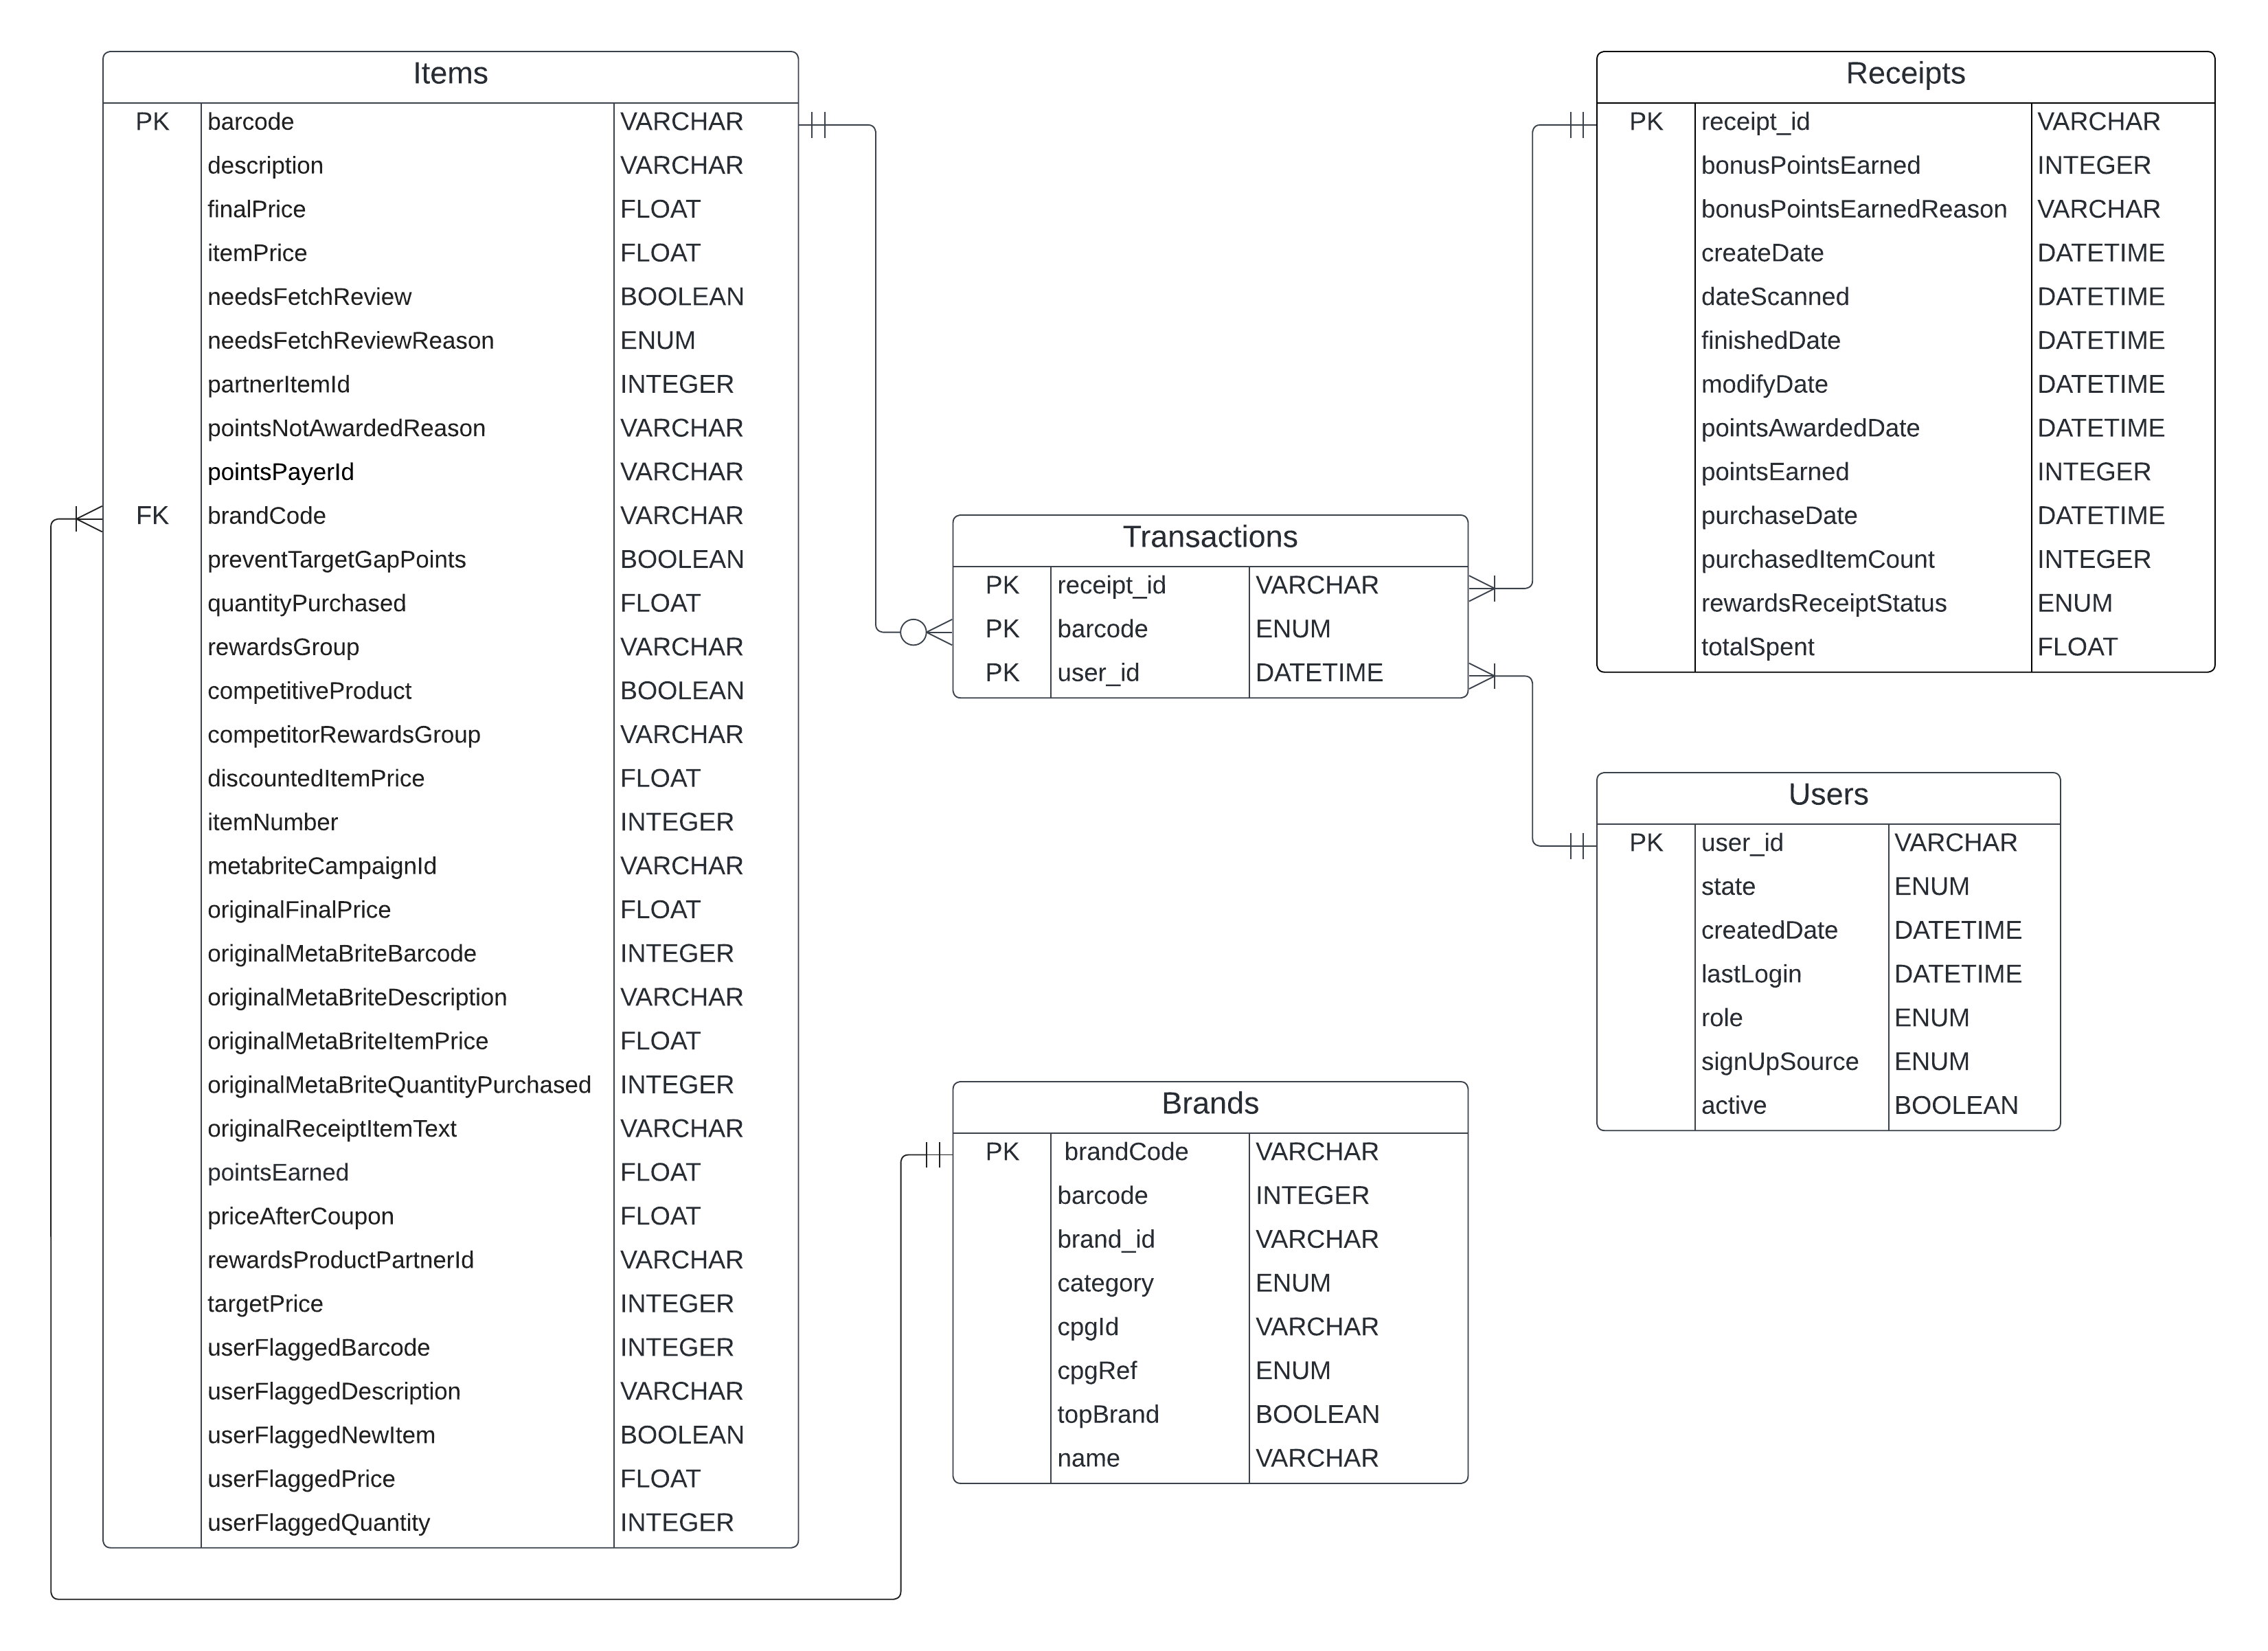

The above Relational Model was designed using LucidChart keeping in mind the  multiplicities based on the relations between the tables and relevant datatypes.

**Transcation** table is a juction table with composite key to handle the many to many relations.

# Second: Write a query that directly answers a predetermined question from a business stakeholder

## Create DB

In [47]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Get a list of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Drop each table
for table in tables:
    table_name = table[0]
    cursor.execute(f"DROP TABLE IF EXISTS {table_name};")

# Create a connection to the SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Enable foreign key constraints
cursor.execute("PRAGMA foreign_keys = ON;")

# Create Users table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Users (
        user_id TEXT PRIMARY KEY,
        active BOOLEAN,
        createdDate TEXT,
        lastLogin TEXT,
        role TEXT,
        signUpSource TEXT,
        state TEXT
    )''')

# Create Receipts table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Receipts (
        receipt_id INTEGER PRIMARY KEY,
        bonusPointsEarned INTEGER,
        bonusPointsEarnedReason TEXT,
        createDate TEXT,
        dateScanned TEXT,
        finishedDate TEXT,
        modifyDate TEXT,
        pointsAwardedDate TEXT,
        pointsEarned INTEGER,
        purchaseDate TEXT,
        purchasedItemCount INTEGER,
        rewardsReceiptStatus TEXT,
        totalSpent REAL
    )''')

# Create Items table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Items (
        barcode INTEGER PRIMARY KEY,
        brandCode INTEGER,
        competitiveProduct INTEGER,
        competitorRewardsGroup TEXT,
        description TEXT,
        discountedItemPrice REAL,
        finalPrice REAL,
        itemNumber TEXT,
        itemPrice REAL,
        metabriteCampaignId INTEGER,
        needsFetchReview INTEGER,
        needsFetchReviewReason TEXT,
        originalFinalPrice REAL,
        originalMetaBriteBarcode INTEGER,
        originalMetaBriteDescription TEXT,
        originalMetaBriteItemPrice REAL,
        originalMetaBriteQuantityPurchased INTEGER,
        originalReceiptItemText TEXT,
        partnerItemId TEXT,
        pointsEarned INTEGER,
        pointsNotAwardedReason TEXT,
        pointsPayerId TEXT,
        preventTargetGapPoints INTEGER,
        priceAfterCoupon REAL,
        quantityPurchased INTEGER,
        rewardsGroup TEXT,
        rewardsProductPartnerId TEXT,
        targetPrice REAL,
        userFlaggedBarcode INTEGER,
        userFlaggedDescription TEXT,
        userFlaggedNewItem INTEGER,
        userFlaggedPrice REAL,
        userFlaggedQuantity INTEGER,
        FOREIGN KEY (barcode) REFERENCES Brands(barcode)
    )''')

# Create Brands table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Brands (
        brandCode INTEGER PRIMARY KEY,
        barcode INTEGER,
        category TEXT,
        cpgref TEXT,
        cpgid INTEGER,
        name TEXT,
        topBrand INTEGER,
        _id INTEGER UNIQUE,
        FOREIGN KEY (barcode) REFERENCES Items(barcode)
    )''')

# Create Transaction table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Transactions (
        receipt_id INTEGER,
        barcode INTEGER,
        user_id INTEGER,
        PRIMARY KEY (receipt_id, barcode, user_id),
        FOREIGN KEY (receipt_id) REFERENCES Receipts(receipt_id),
        FOREIGN KEY (barcode) REFERENCES Items(barcode),
        FOREIGN KEY (user_id) REFERENCES Users(user_id)
    )''')

conn.commit()
cursor.close()
conn.close()

In [48]:
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Enable foreign key constraints
cursor.execute("PRAGMA foreign_keys = ON;")

users = users.rename(columns={'_id': 'user_id'})
users['createdDate'] = users['createdDate'].astype(str)
users['lastLogin'] = users['lastLogin'].astype(str)
receipts = receipts.rename(columns={'_id': 'receipt_id'})
receipts.drop(columns=['rewardsReceiptItemList','userId'], inplace=True)# Populate Receipts table
brands = brands.rename(columns={'_id': 'brand_id'})

# Populate Users table
users.to_sql('Users', conn, if_exists='replace', index=False)
brands.to_sql('Brands', conn, if_exists='replace', index=False)
receipts.to_sql('Receipts', conn, if_exists='replace', index=False)
items.to_sql('Items', conn, if_exists='replace', index=False)
Transactions.to_sql('Transactions', conn, if_exists='replace', index=False)

conn.commit()
cursor.close()
conn.close()

## Queries Execution

In [49]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Function to print the first 5 records of a table
def print_first_5_records(table_name):
    print(f"First 5 records of table '{table_name}':")
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 5")
    records = cursor.fetchall()
    for record in records:
        print(record)
    print()

# Print first 5 records for each table
print_first_5_records("Users")
print_first_5_records("Receipts")
print_first_5_records("Items")
print_first_5_records("Brands")
print_first_5_records("Transactions")

# Close connection
cursor.close()
conn.close()

First 5 records of table 'Users':
('5ff1e194b6a9d73a3a9f1052', 1, '1609687444800', '1609687537858.0', 'consumer', 'Email', 'WI')
('5ff1e194b6a9d73a3a9f1052', 1, '1609687444800', '1609687537858.0', 'consumer', 'Email', 'WI')
('5ff1e194b6a9d73a3a9f1052', 1, '1609687444800', '1609687537858.0', 'consumer', 'Email', 'WI')
('5ff1e1eacfcf6c399c274ae6', 1, '1609687530554', '1609687530597.0', 'consumer', 'Email', 'WI')
('5ff1e194b6a9d73a3a9f1052', 1, '1609687444800', '1609687537858.0', 'consumer', 'Email', 'WI')

First 5 records of table 'Receipts':
('5ff1e1eb0a720f0523000575', 500.0, 'Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)', 1609687531000, 1609687531000, 1609687531000.0, 1609687536000, 1609687531000.0, '500.0', 1609632000000.0, 5.0, 'FINISHED', '26.00')
('5ff1e1bb0a720f052300056b', 150.0, 'Receipt number 5 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)', 1609687483000, 1609687483000, 1609687483000.0, 1609687488000, 1609687483000.

### 1. What are the top 5 brands by receipts scanned for most recent month?

In [ ]:
import sqlite3
from datetime import datetime, timedelta

# Connect to the database
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Calculate the date range for the most recent month
current_date = datetime.now()
first_day_of_current_month = current_date.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
last_day_of_previous_month = first_day_of_current_month - timedelta(days=1)
first_day_of_previous_month = last_day_of_previous_month.replace(day=1)

# Query to find the top 5 brands by receipts scanned for the most recent month
cursor.execute("""
    SELECT b.name, COUNT(*) AS total_receipts
    FROM Receipts r
    INNER JOIN Transactions t ON r.receipt_id = t.receipt_id
    INNER JOIN Items i ON t.barcode = i.barcode
    INNER JOIN Brands b ON i.barcode = b.barcode
    WHERE r.dateScanned BETWEEN ? AND ?
    GROUP BY b.name
    ORDER BY total_receipts DESC
    LIMIT 5
""", (first_day_of_previous_month.strftime('%Y-%m-%d'), last_day_of_previous_month.strftime('%Y-%m-%d')))

top_5_brands = cursor.fetchall()
print("Top 5 Brands by Receipts Scanned for the Most Recent Month:")
for idx, (brand_name, total_receipts) in enumerate(top_5_brands, start=1):
    print(f"{idx}. {brand_name}: {total_receipts} receipts")

# Close connection
cursor
conn.close()

### 2. How does the ranking of the top 5 brands by receipts scanned for the recent month compare to the ranking for the previous month?

In [ ]:
import sqlite3
from datetime import datetime, timedelta

# Connect to the database
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Function to get top 5 brands by receipts scanned for a given month
def get_top_5_brands(month):
    first_day_of_month = month.replace(day=1)
    last_day_of_month = month.replace(day=1, month=month.month % 12 + 1) - timedelta(days=1)

    cursor.execute("""
        SELECT b.name, COUNT(*) AS total_receipts
        FROM Receipts r
        INNER JOIN Transactions t ON r.receipt_id = t.receipt_id
        INNER JOIN Items i ON t.barcode = i.barcode
        INNER JOIN Brands b ON i.brandCode = b.brandCode
        WHERE r.dateScanned BETWEEN ? AND ?
        GROUP BY b.name
        ORDER BY total_receipts DESC
        LIMIT 5
    """, (first_day_of_month.strftime('%Y-%m-%d'), last_day_of_month.strftime('%Y-%m-%d')))

    return cursor.fetchall()

# Get current month and previous month
current_month = datetime.now().replace(day=1)
previous_month = (current_month - timedelta(days=1)).replace(day=1)

# Get top 5 brands for the current month and previous month
top_5_current_month = get_top_5_brands(current_month)
top_5_previous_month = get_top_5_brands(previous_month)

# Print top 5 brands for the current month
print("Top 5 Brands for the Current Month:")
for idx, (brand_name, total_receipts) in enumerate(top_5_current_month, start=1):
    print(f"{idx}. {brand_name}: {total_receipts} receipts")

# Print top 5 brands for the previous month
print("\nTop 5 Brands for the Previous Month:")
for idx, (brand_name, total_receipts) in enumerate(top_5_previous_month, start=1):
    print(f"{idx}. {brand_name}: {total_receipts} receipts")

# Compare rankings
current_month_brands = [brand[0] for brand in top_5_current_month]
previous_month_brands = [brand[0] for brand in top_5_previous_month]

print("\nComparison of Top 5 Brands Ranking:")
for idx, brand in enumerate(current_month_brands, start=1):
    if brand in previous_month_brands:
        previous_rank = previous_month_brands.index(brand) + 1
        print(f"{brand}: Current Rank - {idx}, Previous Rank - {previous_rank}")
    else:
        print(f"{brand}: Current Rank - {idx}, Previous Rank - Not in top 5")

# Close connection
conn.close()

### 3. When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [ ]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Query to find the average spend from receipts with 'rewardsReceiptStatus' of 'Accepted'
cursor.execute("""
    SELECT AVG(totalSpent) AS avg_spent_accepted
    FROM Receipts
    WHERE rewardsReceiptStatus = 'ACCEPTED'
""")
row_accepted = cursor.fetchone()
avg_spent_accepted = row_accepted[0] if row_accepted[0] is not None else 0  # Handle None case

# Query to find the average spend from receipts with 'rewardsReceiptStatus' of 'Rejected'
cursor.execute("""
    SELECT AVG(totalSpent) AS avg_spent_rejected
    FROM Receipts
    WHERE rewardsReceiptStatus = 'REJECTED'
""")
row_rejected = cursor.fetchone()
avg_spent_rejected = row_rejected[0] if row_rejected[0] is not None else 0  # Handle None case

# Print the average spend for each status
print("Average Spend (Accepted):", avg_spent_accepted)
print("Average Spend (Rejected):", avg_spent_rejected)

# Determine which average spend is greater
if avg_spent_accepted > avg_spent_rejected:
    print("Average spend from receipts with 'Accepted' status is greater.")
elif avg_spent_accepted < avg_spent_rejected:
    print("Average spend from receipts with 'Rejected' status is greater.")
else:
    print("Average spend from receipts with 'Accepted' and 'Rejected' status are equal.")

# Close connection
cursor.close()
conn.close()

### 4. When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [ ]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Query to find the total number of items purchased from receipts with 'rewardsReceiptStatus' of 'Accepted'
cursor.execute("""
    SELECT SUM(purchasedItemCount) AS total_items_accepted
    FROM Receipts
    WHERE rewardsReceiptStatus = 'ACCEPTED'
""")
row_accepted = cursor.fetchone()
total_items_accepted = row_accepted[0] if row_accepted[0] is not None else 0  # Handle None case

# Query to find the total number of items purchased from receipts with 'rewardsReceiptStatus' of 'Rejected'
cursor.execute("""
    SELECT SUM(purchasedItemCount) AS total_items_rejected
    FROM Receipts
    WHERE rewardsReceiptStatus = 'REJECTED'
""")
row_rejected = cursor.fetchone()
total_items_rejected = row_rejected[0] if row_rejected[0] is not None else 0  # Handle None case

# Print the total number of items for each status
print("Total Items Purchased (Accepted):", total_items_accepted)
print("Total Items Purchased (Rejected):", total_items_rejected)

# Determine which total is greater
if total_items_accepted > total_items_rejected:
    print("Total items purchased from receipts with 'Accepted' status is greater.")
elif total_items_accepted < total_items_rejected:
    print("Total items purchased from receipts with 'Rejected' status is greater.")
else:
    print("Total items purchased from receipts with 'Accepted' and 'Rejected' status are equal.")

# Close connection
cursor.close()
conn.close()

### 5. Which brand has the most spend among users who were created within the past 6 months?*italicized text*

In [ ]:
import sqlite3
from datetime import datetime, timedelta

# Connect to the database
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Calculate the date 6 months ago from today
six_months_ago = datetime.now() - timedelta(days=6*30)

# Query to find users created within the past 6 months
cursor.execute("""
    SELECT user_id
    FROM Users
    WHERE createdDate >= ?
""", (six_months_ago.strftime('%Y-%m-%d'),))
recent_users = cursor.fetchall()

# Convert user IDs to a tuple for use in SQL query
recent_user_ids = tuple(user[0] for user in recent_users)

# Query to find receipts associated with recent users and join with items to obtain brand information
cursor.execute("""
    SELECT b.name, SUM(r.totalSpent) AS total_spend
    FROM Receipts r
    INNER JOIN Transactions t ON r.receipt_id = t.receipt_id
    INNER JOIN Items i ON t.barcode = i.barcode
    INNER JOIN Brands b ON i.brandCode = b.brandCode
    WHERE t.user_id IN {}
    GROUP BY b.name
    ORDER BY total_spend DESC
    LIMIT 1
""".format(recent_user_ids))

# Fetch the brand with the highest total spend
brand_with_highest_spend = cursor.fetchone()

# Print the result
if brand_with_highest_spend:
    print("The brand with the most spend among users created within the past 6 months is:", brand_with_highest_spend[0])
else:
    print("No brand spend data available for users created within the past 6 months.")

# Close connection
cursor.close()
conn.close()

### 6. Which brand has the most transactions among users who were created within the past 6 months?

In [ ]:
import sqlite3
from datetime import datetime, timedelta

# Connect to the database
conn = sqlite3.connect('db1.db')
cursor = conn.cursor()

# Calculate the date 6 months ago from today
six_months_ago = datetime.now() - timedelta(days=6*30)

# Query to find users created within the past 6 months
cursor.execute("""
    SELECT user_id
    FROM Users
    WHERE createdDate >= ?
""", (six_months_ago.strftime('%Y-%m-%d'),))
recent_users = cursor.fetchall()

# Convert user IDs to a tuple for use in SQL query
recent_user_ids = tuple(user[0] for user in recent_users)

# Query to find transactions associated with recent users and join with items to obtain brand information
cursor.execute("""
    SELECT b.name, COUNT(*) AS transaction_count
    FROM Transactions t
    INNER JOIN Items i ON t.barcode = i.barcode
    INNER JOIN Brands b ON i.brandCode = b.brandCode
    WHERE t.user_id IN {}
    GROUP BY b.name
    ORDER BY transaction_count DESC
    LIMIT 1
""".format(recent_user_ids))

# Fetch the brand with the highest number of transactions
brand_with_most_transactions = cursor.fetchone()

# Print the result
if brand_with_most_transactions:
    print("The brand with the most transactions among users created within the past 6 months is:", brand_with_most_transactions[0])
else:
    print("No transaction data available for users created within the past 6 months.")

# Close connection
cursor.close()
conn.close()

# Third: Evaluate Data Quality Issues in the Data Provided

1.   **Empty Files**: Initially, there were issues loading the files directly from .gz due to empty errors. This suggests potential data corruption or incompleteness.

2.   **Missing Values**: Around 10% of the columns of signUpSource, state, and lastLogin in Users have missing values. Additionally, columns such as category, brandCode, and topBrand in Brands have missing values ranging from 13% to over 50%. Handling missing values appropriately is crucial to ensure accurate analysis and modeling.

3. **Redundant Information**: Over 50% of the rows in Users contain redundant information. This redundancy can increase storage requirements and complicate data management.

4. **Date Columns Representation**: Date columns have a MongoDB representation and need to be converted to human-readable datetime type in Coordinated Universal Time (UTC) format. Consistent and standardized date representation is essential for analysis and modeling.

5. **Incomplete Data**: More than half of the columns have missing data greater than ~40% in Receipts, indicating potentially incomplete or unreliable data sources.

6. **Data Type Inconsistencies:** The need for transformation to access values from dictionaries suggests potential data type inconsistencies. Ensuring consistent data types across columns is important for accurate analysis.

7. **Other:** Unpacking values from the cpg column and using brandCode as a key to connect Items and Brands may introduce potential data integrity issues if not handled properly. The reventTargetGapPoints column only contains TRUE values and not FALSE, which could indicate a data quality issue or a specific data collection process that needs clarification.

To address these data quality issues, thorough data exploration, cleaning, and validation processes should be conducted. This may include handling missing values, transforming data types, removing redundant information, verifying data integrity, and ensuring consistency in representation and structure. Additionally, collaboration with data stakeholders and domain experts can provide valuable insights into the data and help identify and address potential issues.

# Fourth: Communicate with Stakeholders

Subject: Data Quality Issues and Recommendations

Hello Product Leader,

I hope this email finds you well. I wanted to reach out to discuss some observations and recommendations regarding the data we've been working with. As we continue to leverage this data for various business purposes, it's crucial to ensure its accuracy, completeness, and consistency.

**Identified Data Quality Issues:**

1. **Empty Files**: Initially, we encountered issues loading the files directly from .gz due to empty errors. This suggests potential data corruption or incompleteness, which could impact the reliability of our analyses.

2. **Missing Values**: We've observed missing values in several columns across different datasets. For example, around 10% of the columns in the Users dataset have missing values in signUpSource, state, and lastLogin. Similarly, columns such as category, brandCode, and topBrand in the Brands dataset have missing values ranging from 13% to over 50%.

3. **Redundant Information**: More than 50% of the rows in the Users dataset contain redundant information. This redundancy not only increases storage requirements but also complicates data management and analysis.

4. **Date Columns Representation**: Date columns have a MongoDB representation, which needs to be converted to human-readable datetime type in Coordinated Universal Time (UTC) format for consistency and standardized analysis.

5. **Incomplete Data**: Over half of the columns in the Receipts dataset have missing data greater than ~40%, indicating potentially incomplete or unreliable data sources.

6. **Data Type Inconsistencies**: There are potential data type inconsistencies, as indicated by the need for transformation to access values from dictionaries. Ensuring consistent data types across columns is crucial for accurate analysis.

**Action Items:**

1. **Data Cleaning and Transformation**: We need to conduct thorough data cleaning and transformation processes to handle missing values, remove redundant information, and ensure consistency in representation and structure.

2. **Standardized Date Representation**: Converting date columns to human-readable datetime type in Coordinated Universal Time (UTC) format is essential for consistent and standardized analysis.

3. **Data Integrity Check**: We should perform a data integrity check to ensure that unpacking values from the cpg column and using brandCode as a key to connect Items and Brands do not introduce potential data integrity issues.

4. **Clarification on reventTargetGapPoints**: We need clarification on why the reventTargetGapPoints column only contains TRUE values and not FALSE. Understanding the context behind this data collection process will help us interpret and analyze it accurately.

**Questions and Next Steps:**

1. **Questions About the Data**: Do you have any questions or concerns about the data quality issues identified? Understanding your perspective will help us prioritize and address these issues effectively.

2. **Resolution of Data Quality Issues**: What additional information or resources do you think we need to resolve the data quality issues effectively?

3. **Optimization of Data Assets**: Are there any specific goals or objectives you have in mind for optimizing the data assets we're creating? Your insights will guide us in aligning our efforts with business priorities.

4. **Performance and Scaling Concerns**: As we move towards production, what performance and scaling concerns do you anticipate, and how do you envision addressing them?

I look forward to discussing these points further and collaborating on enhancing the quality and utility of our data assets. Please feel free to reach out if you have any questions or would like to discuss this in more detail.


- Best regards,
- Soham Shinde